In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
sns.set()

In [222]:
df=pd.read_csv('titanic_train.csv')

In [223]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking the shape of the dataset

In [224]:
df.shape

(891, 12)

There are 891 rows and 12 columns

checking null values

In [225]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [226]:
# checking NA
df.isna().sum()

# We can see that some columns have null values in them. We need to clean our dataset in order for us to perform further analysis. 
# We do not need the Cabin column for our analysis so, we will drop it from our dataset.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [227]:
df.drop('Cabin', axis = 1, inplace = True)

In [228]:
# Replacing NA
df.Age = df.Age.fillna(df.Age.mean())
df.Embarked = df.Embarked.fillna('S')

In [229]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [230]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Graph showing Number of passengers vs Survived')

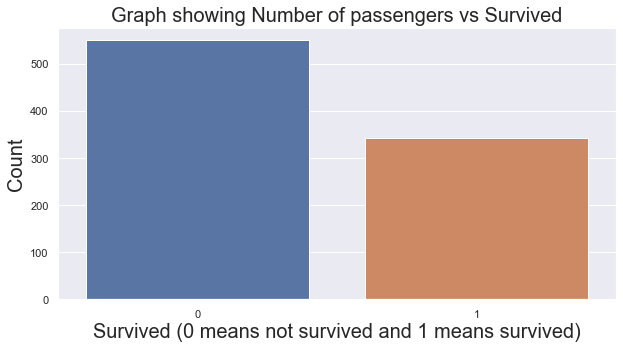

In [231]:
plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.countplot(x='Survived', data = df)
plt.xlabel('Survived (0 means not survived and 1 means survived)', fontsize=20)
plt.ylabel('Count', fontsize=20)

plt.title('Graph showing Number of passengers vs Survived', fontsize = 20)

In [232]:
#unique values
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [234]:
# train test data split

train, test = train_test_split(df, test_size=0.25, random_state=1)
print('Train data points :', len(train))
print('Test data points :', len(test))

Train data points : 668
Test data points : 223


In [235]:
#Variable separation

numerical_features = ['PassengerId', 'Pclass', 'Age','SibSp',
                      'Parch']

categorical_features = ['Sex','Embarked']

features = numerical_features + categorical_features

target = 'Survived'

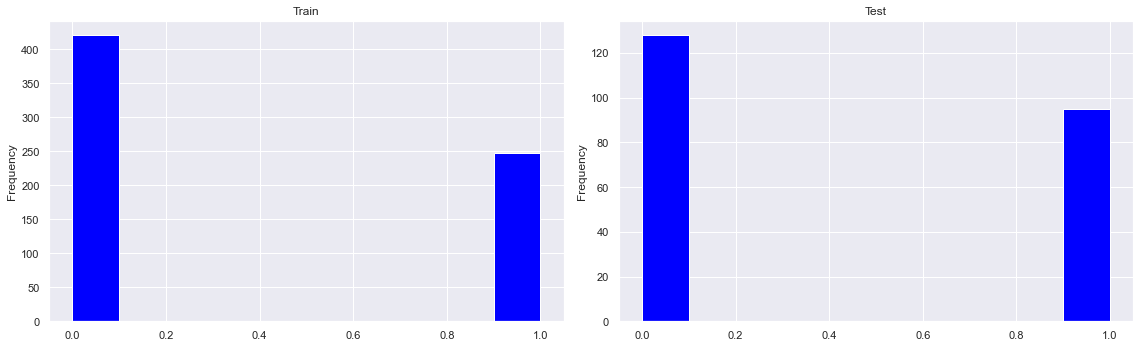

In [236]:
#Target distribution

fig, axes = plt.subplots(ncols=2,figsize=(16, 5))

train[target].plot.hist(color='blue', ax=axes[0])
axes[0].set(title="Train")

test[target].plot.hist(color='blue', ax=axes[1])
axes[1].set(title="Test")

plt.tight_layout()
plt.show()

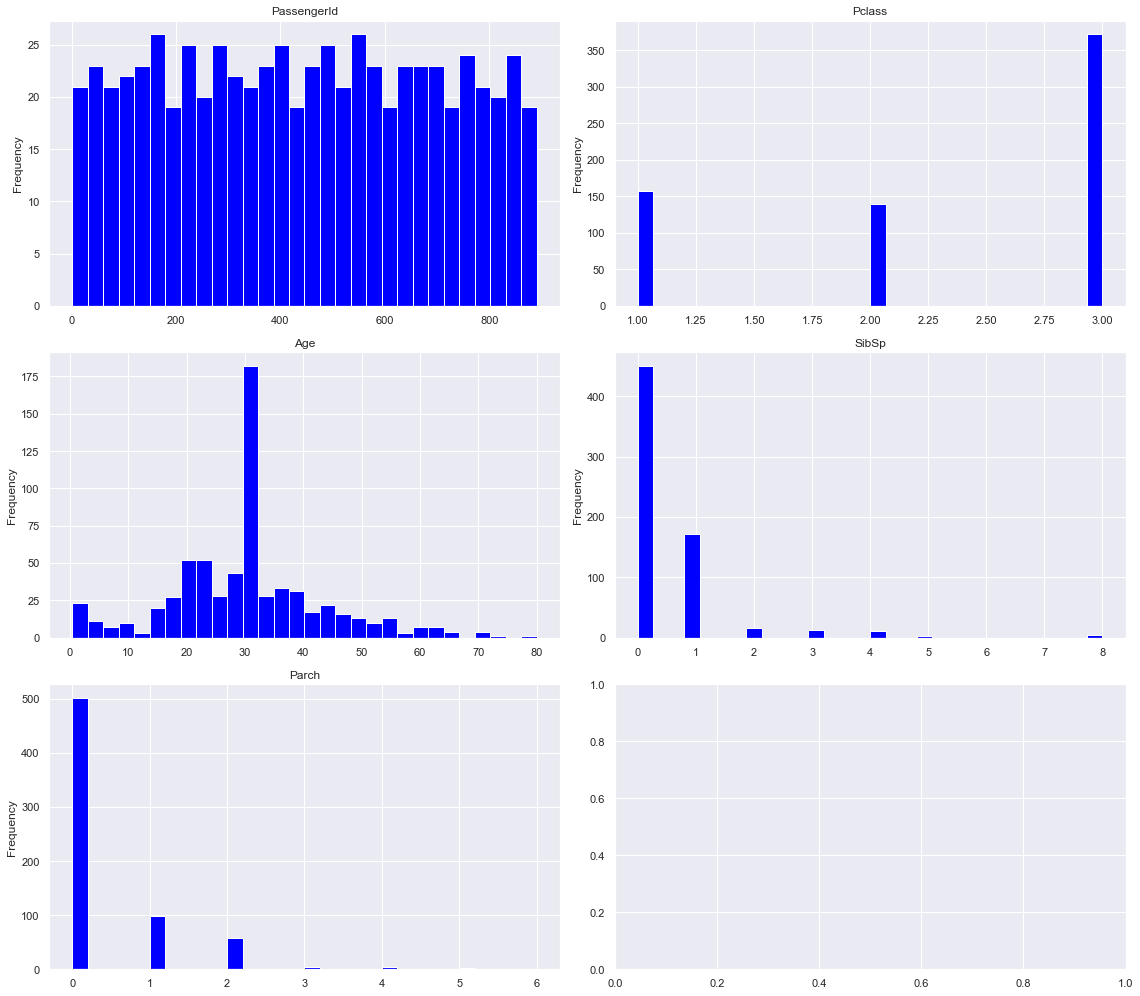

In [237]:
#Distribution of the numerical features:

fig, axes = plt.subplots(3,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = train[c].plot(kind = 'hist', ax=axes[i], title=c, color='blue', bins=30)
    
plt.tight_layout()
plt.show()

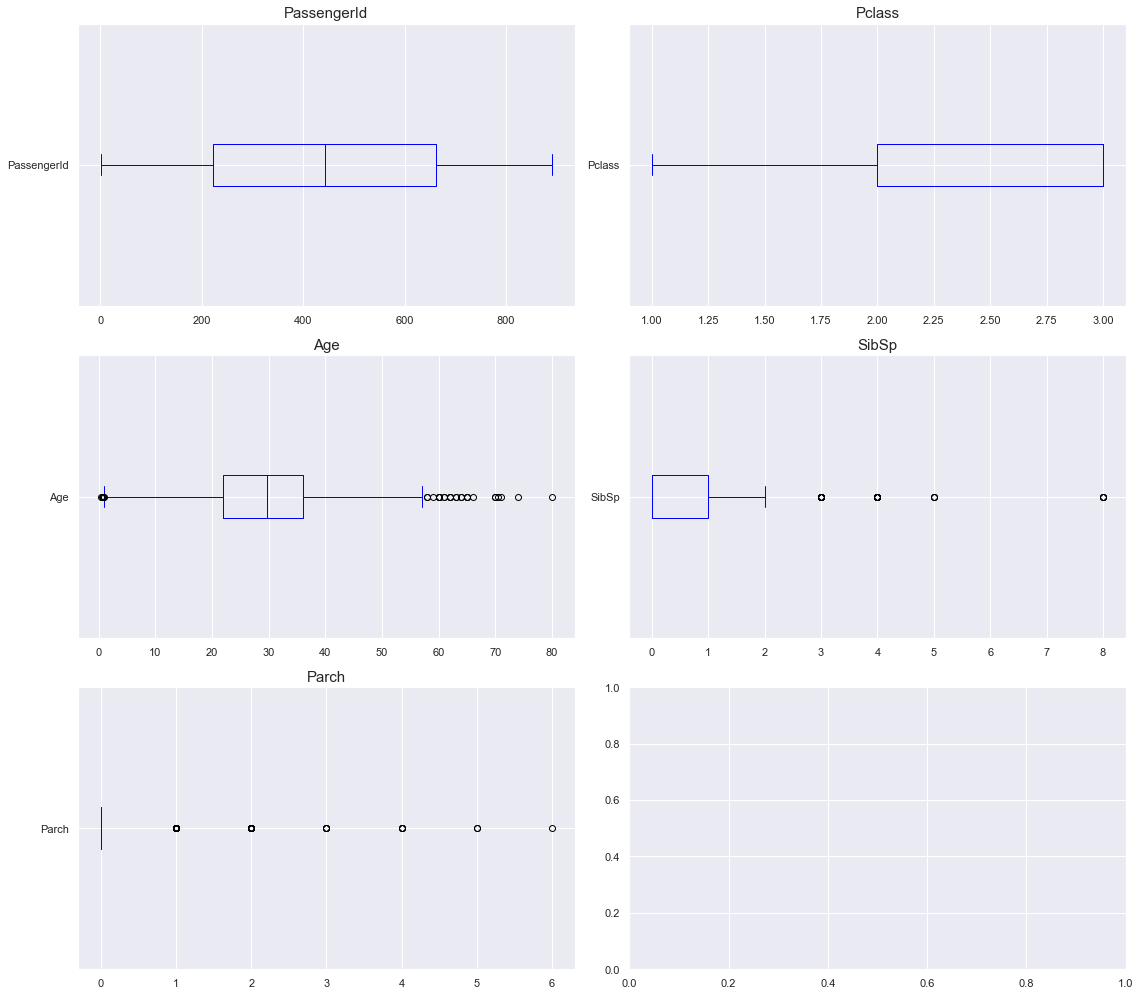

In [238]:
#Box Plot to check outliers:

fig, axes = plt.subplots(3,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = train[c].plot(kind = 'box', ax=axes[i],color='blue', vert=False)
    axes[i].set_title(c, fontsize=15)
    
plt.tight_layout()
plt.show()

Most of the features contain outliers.

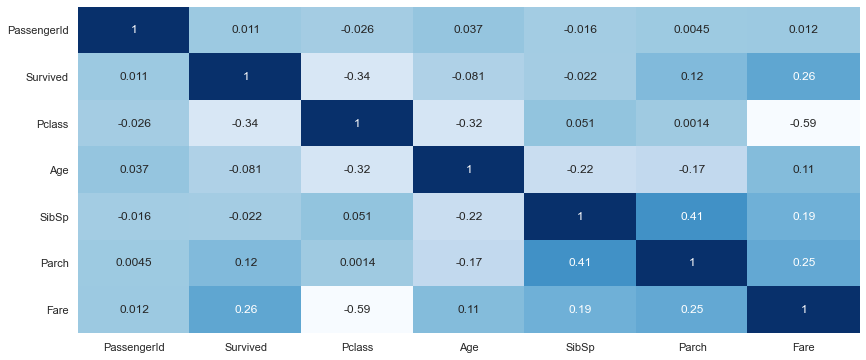

In [239]:
#Pearson Correlation
plt.figure(figsize=(14,6))
sns.heatmap(train.corr(method='pearson'), annot=True, cbar=False, cmap='Blues')
plt.show()

In [240]:
train.Sex = train.Sex.replace({"male":1, "female":0})
test.Sex = test.Sex.replace({"male":1, "female":0})
train.Embarked = train.Embarked.replace({"S":1, "Q":0,"C":-1})
test.Embarked = test.Embarked.replace({"S":1, "Q":0,"C":-1})


In [241]:
combine = [train, test]
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
35,36,0,1,"Holverson, Mr. Alexander Oskar",1,2.0,1,0,113789,52.0000,1
46,47,0,3,"Lennon, Mr. Denis",1,1.0,1,0,370371,15.5000,0
453,454,1,1,"Goldenberg, Mr. Samuel L",1,3.0,1,0,17453,89.1042,-1
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",0,1.0,1,0,11967,91.0792,-1
748,749,0,1,"Marvin, Mr. Daniel Warner",1,1.0,1,0,113773,53.1000,1


In [242]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Sex,Embarked
35,36,1,2.0,1,0,1,1
46,47,3,1.0,1,0,1,0
453,454,1,3.0,1,0,1,-1
291,292,1,1.0,1,0,0,-1
748,749,1,1.0,1,0,1,1


To create a model with all features

In [243]:
models = {'linear_regression':LinearRegression(),
         
         'lasso':Lasso(random_state=1),
         
         'decision_tree':DecisionTreeRegressor(random_state=1),
         
         'random_forest':RandomForestRegressor(random_state=1),
        }

In [244]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def eval_model(model, X_train, y_train, X_test, y_test):
    _ = model.fit(X_train, y_train)
    print("Train rmse : ", rmse(y_train, model.predict(X_train)))
    print("Test rmse : ", rmse(y_test, model.predict(X_test)))

In [245]:
for key, regressor in models.items():
    print(key)
    eval_model(regressor, X_train, y_train, X_test, y_test)
    print("\n\n")

linear_regression
Train rmse :  0.3799009990295344
Test rmse :  0.39444890600746535



lasso
Train rmse :  0.48272813874530374
Test rmse :  0.49774626264270244



decision_tree
Train rmse :  0.0
Test rmse :  0.5230130026078329



random_forest
Train rmse :  0.1480860932632233
Test rmse :  0.4287802075279513





In [247]:
#Hyperparameter tuning
# Linear regression
lr_params = {'fit_intercept':[True,False]}

# Lasso
lasso_params = {'alpha': [1e-4, 1e-3, 1e-2, 1, 10, 100]}

# Decision tree
dt_params =  {'max_depth': [4, 6, 8, 10, 12, 14, 16, 20],
            'min_samples_split': [5, 10, 20, 30, 40, 50],
            'max_features': [0.2, 0.4, 0.6, 0.8, 1],
            'max_leaf_nodes': [8, 16, 32, 64, 128,256]}

# Random Forest
rf_params = {'bootstrap': [True, False],
             'max_depth': [2, 5, 10, 20, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [100, 150, 200, 250]}

In [248]:
params = [lr_params, lasso_params, dt_params, rf_params]

# searching Hyperparameters
i=0
for name, model in models.items():
    print(name)
    regressor = RandomizedSearchCV(estimator = model,
                                   n_iter=10,
                                   param_distributions = params[i],
                                   cv = 3,
                                   scoring = 'neg_root_mean_squared_error')
    
    search = regressor.fit(X_train, y_train)
    
    print('Best params :',search.best_params_)
    print("RMSE :", -search.best_score_)
    i+=1
    print()

linear_regression
Best params : {'fit_intercept': True}
RMSE : 0.3889306770903442

lasso
Best params : {'alpha': 0.001}
RMSE : 0.3887124984573096

decision_tree
Best params : {'min_samples_split': 10, 'max_leaf_nodes': 16, 'max_features': 0.8, 'max_depth': 12}
RMSE : 0.3832463466964812

random_forest
Best params : {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': False}
RMSE : 0.36494197094188935



In [249]:
#Since Random Forest is performing better so it is selected

rf_params = {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': False}

model = RandomForestRegressor(random_state=1, **rf_params)

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=5, max_features='sqrt',
                      min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200, random_state=1)

In [250]:
#save the model

import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [251]:
#Evaluation

print("Train rmse : ", rmse(y_train, model.predict(X_train)))
print("Test rmse : ", rmse(y_test, model.predict(X_test)))

Train rmse :  0.33180045578996925
Test rmse :  0.3936512012628016
